# Introduction
State notebook purpose here

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf
import warnings

warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv(
    'equity.csv', 
     parse_dates=True,
     index_col=0,
     header=0, 
     sep=',',
     names=['datetime','BTCUSD','cash','fee','total','returns','equity_curve','drawdown'])
df.dropna(inplace=True)

Start date,2018-01-01
End date,2019-04-01
Total months,21
,Backtest
Annual return,nan%
Cumulative returns,-1272.0%
Annual volatility,437.1%
Sharpe ratio,0.98
Calmar ratio,NaN
Stability,NaN
Max drawdown,-1345.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,1345.00,2018-01-07,2019-02-07,NaT,NaN
1,0.00,2018-01-01,2018-01-01,2018-01-01,1
2,0.00,2018-01-01,2018-01-01,2018-01-01,1
3,0.00,2018-01-01,2018-01-01,2018-01-01,1
4,0.00,2018-01-01,2018-01-01,2018-01-01,1


Start date,2018-01-01
End date,2019-04-01
Total months,21
,Backtest
Annual return,nan%
Cumulative returns,-1272.0%
Annual volatility,437.1%
Sharpe ratio,0.98
Calmar ratio,NaN
Stability,NaN
Max drawdown,-1345.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,1345.00,2018-01-07,2019-02-07,NaT,NaN
1,0.00,2018-01-01,2018-01-01,2018-01-01,1
2,0.00,2018-01-01,2018-01-01,2018-01-01,1
3,0.00,2018-01-01,2018-01-01,2018-01-01,1
4,0.00,2018-01-01,2018-01-01,2018-01-01,1


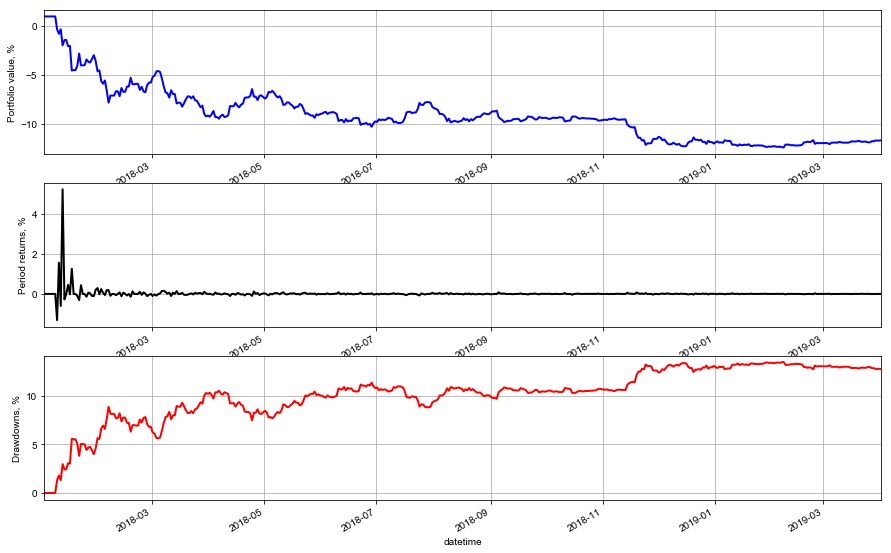

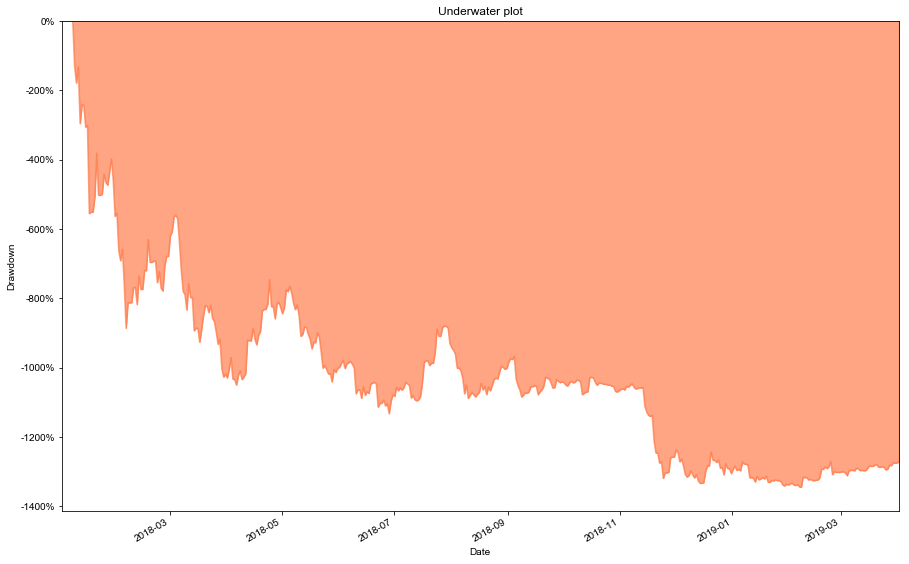

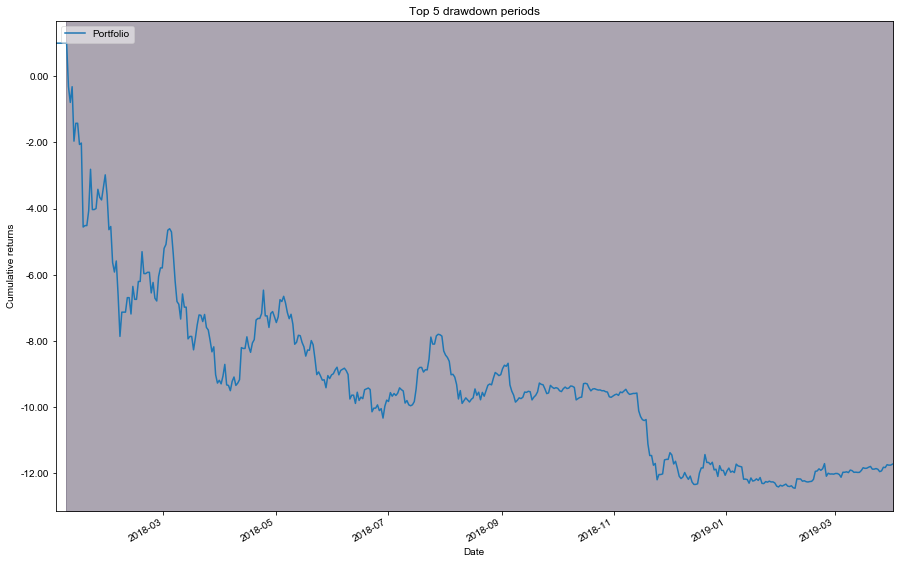

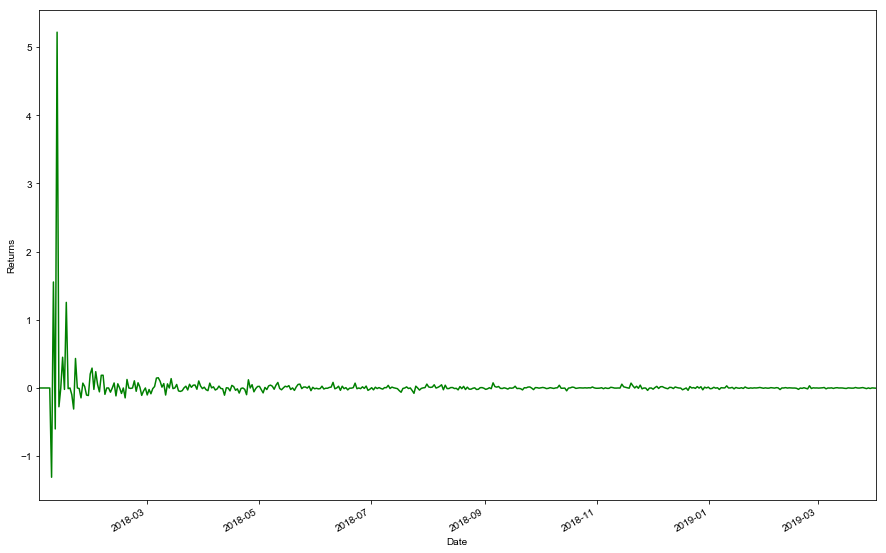

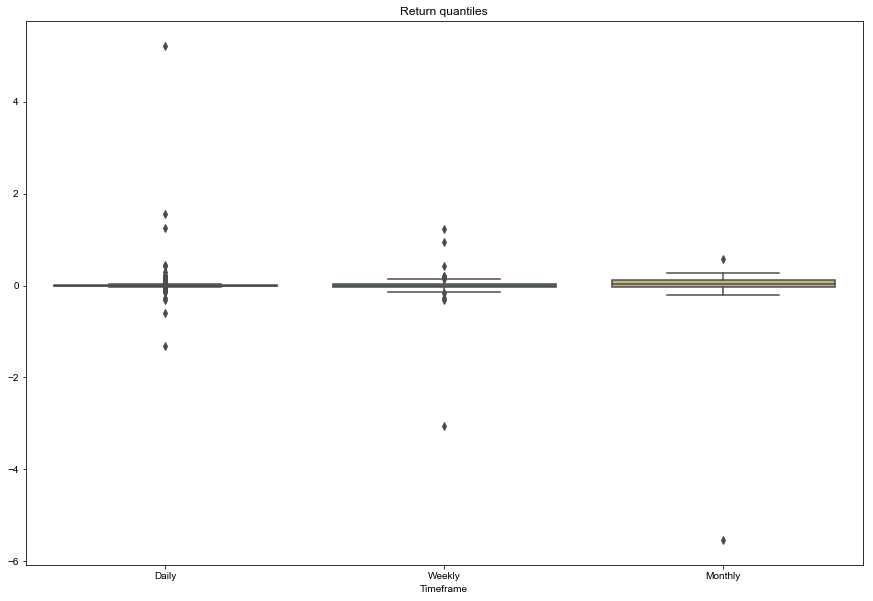

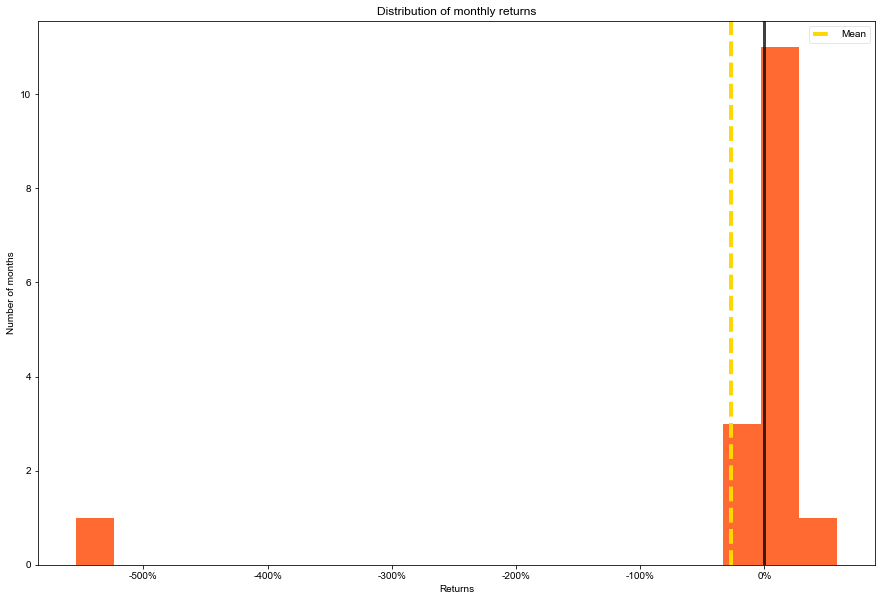

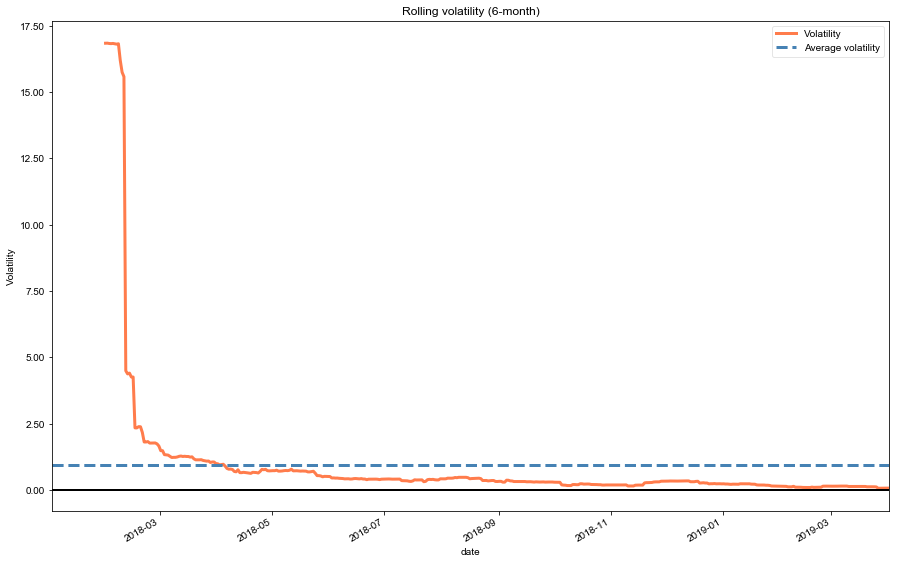

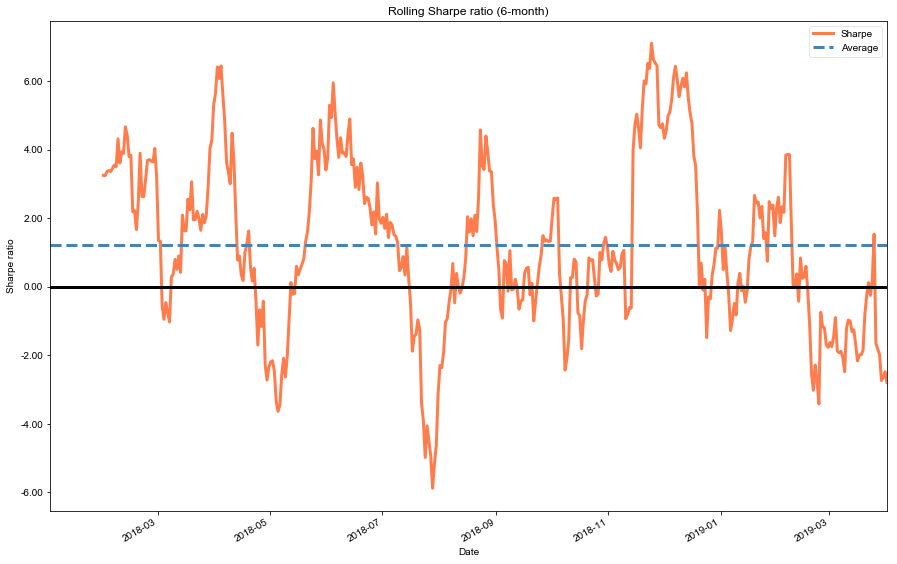

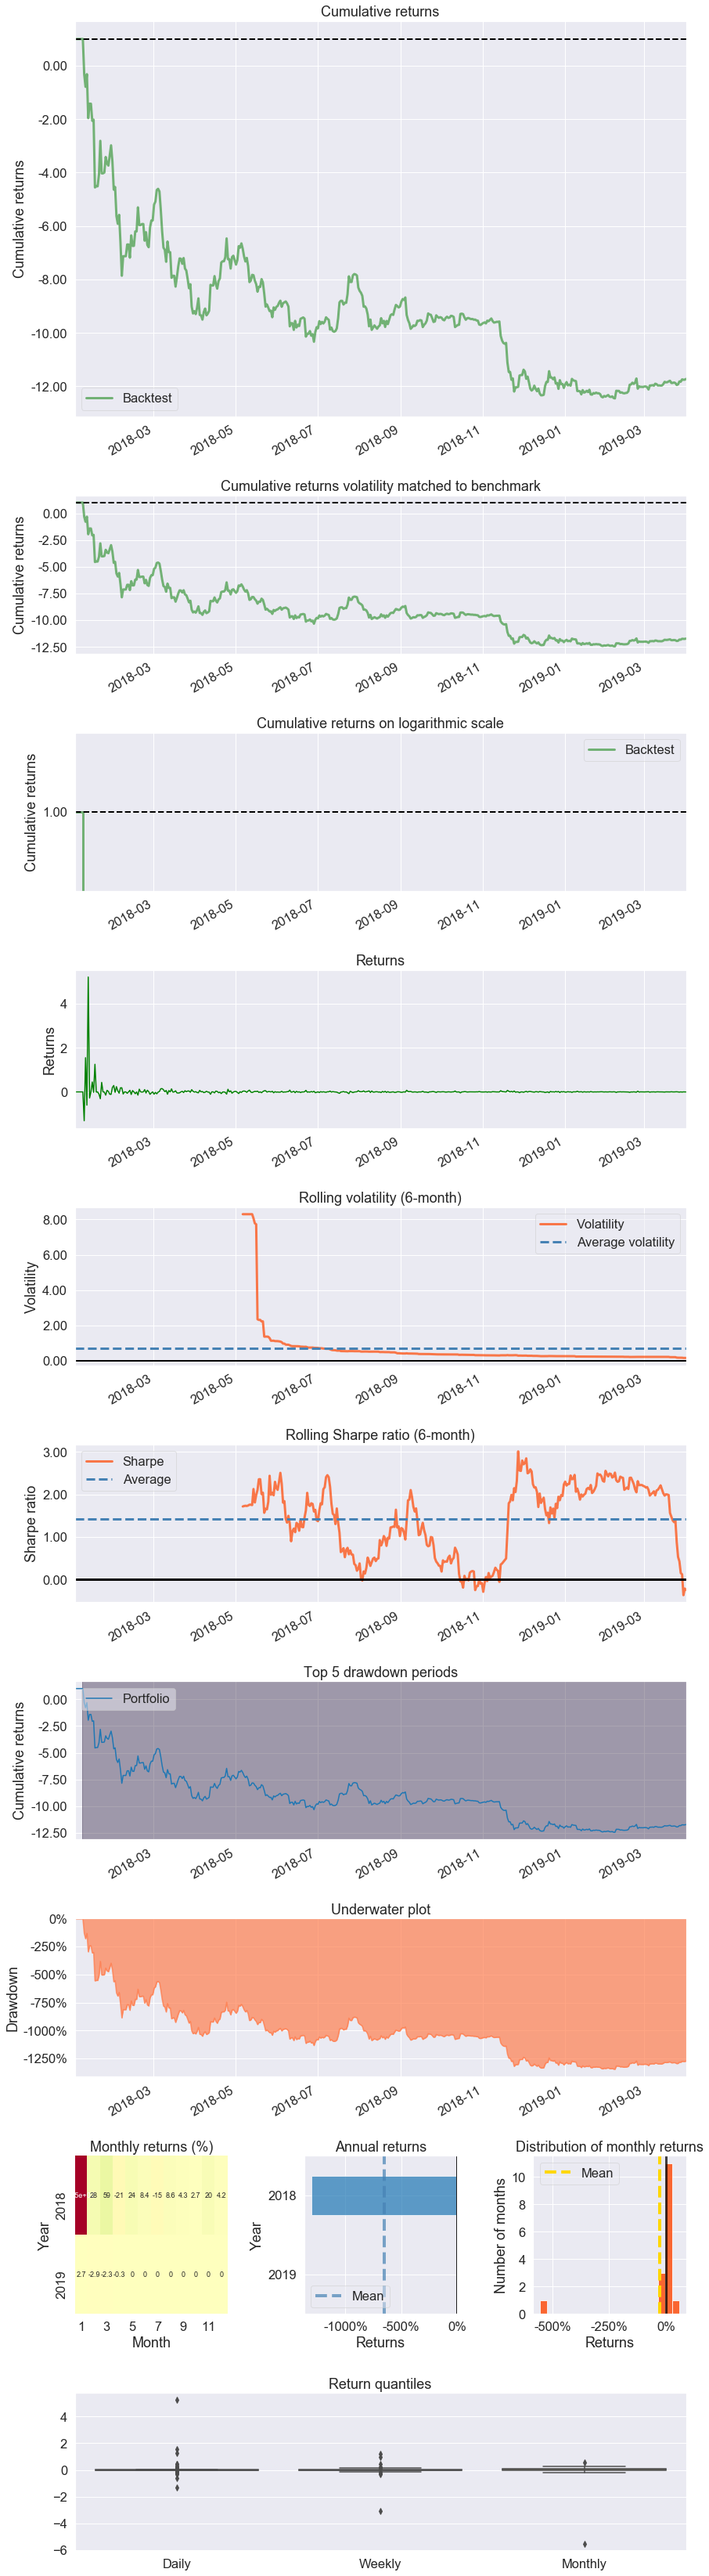

In [46]:
# Plot three charts: Equity curve, 
# period returns, drawdowns
fig = plt.figure(figsize=(15,10));
# Set the outer colour to white
fig.patch.set_facecolor('white');
# Plot the equity curve
ax1 = fig.add_subplot(311, ylabel='Portfolio value, %');
df.equity_curve.plot(ax=ax1, color="blue", lw=2.);
plt.grid(True);

# Plot the returns
ax2 = fig.add_subplot(312, ylabel='Period returns, %');
df.returns.plot(ax=ax2, color="black", lw=2.);
plt.grid(True);

# Plot the returns
ax3 = fig.add_subplot(313, ylabel='Drawdowns, %');
df.drawdown.plot(ax=ax3, color="red", lw=2.);
plt.grid(True);

pf.show_perf_stats(df.returns);
pf.show_worst_drawdown_periods(df.returns);

plt.figure(figsize = (15, 10));
pf.plot_drawdown_underwater(df.returns).set_xlabel('Date');

plt.figure(figsize = (15, 10));
pf.plot_drawdown_periods(df.returns, top=5).set_xlabel('Date');

plt.figure(figsize = (15, 10));
pf.plot_returns(df.returns).set_xlabel('Date');

plt.figure(figsize = (15, 10));
pf.plot_return_quantiles(df.returns).set_xlabel('Timeframe');

plt.figure(figsize = (15, 10));
pf.plot_monthly_returns_dist(df.returns).set_xlabel('Returns');

plt.figure(figsize = (15, 10));
pf.plot_rolling_volatility(df.returns, rolling_window=30).set_xlabel('date');

plt.figure(figsize = (15, 10));
pf.plot_rolling_sharpe(df.returns, rolling_window=30).set_xlabel('Date');

pf.create_returns_tear_sheet(df.returns);